<a href="https://colab.research.google.com/github/dev6589/GRIP_JULY_21/blob/main/TASK3_EDA_RETAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Devendra Bansal

**Task 2: Exploratory Data Analysis - Retail**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/SampleSuperstore.csv")

In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

From the above data we infer the following:
1. There are 4 shipping mode.
2. There are 3 segments of people.

In [9]:
#Checking for duplicated rows

data.duplicated().sum()

17

In [10]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Exploratory Data Analysis

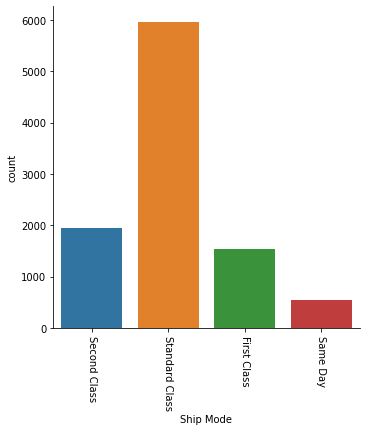

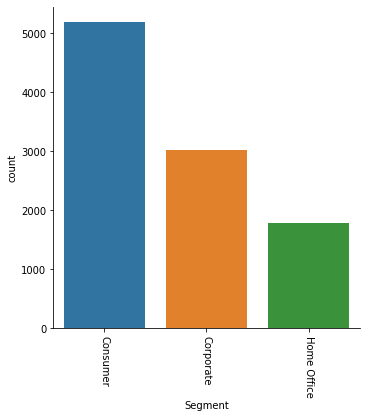

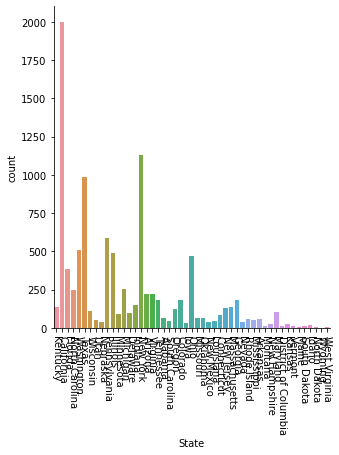

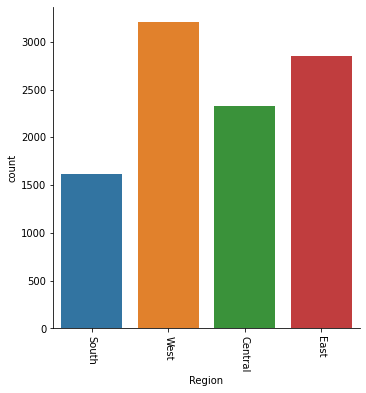

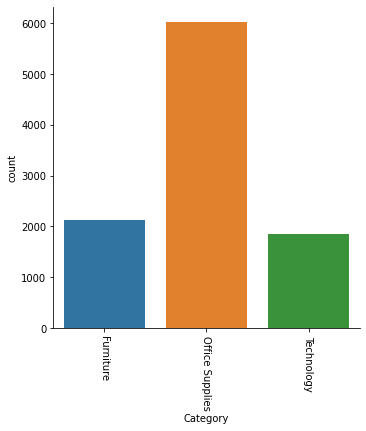

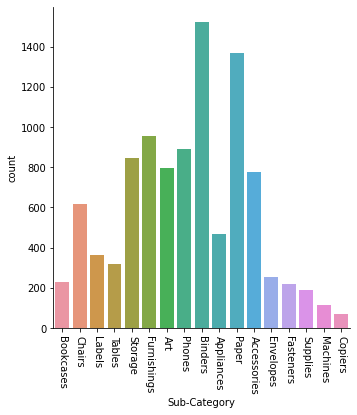

In [11]:
features = data[["Ship Mode", "Segment", "State", "Region", "Category", "Sub-Category"]]
for feature in features:
  sns.catplot(x=feature,kind="count",data=data)
  plt.xticks(rotation = -90)


From the above plots we can conclude that:

1. Most orders are from consumers.
2. Standard Class is the most preferable shipping mode.
3. Most number of orders are from Kentucky.
4. Office suplies are in demand.

In [12]:
corr = data.corr()

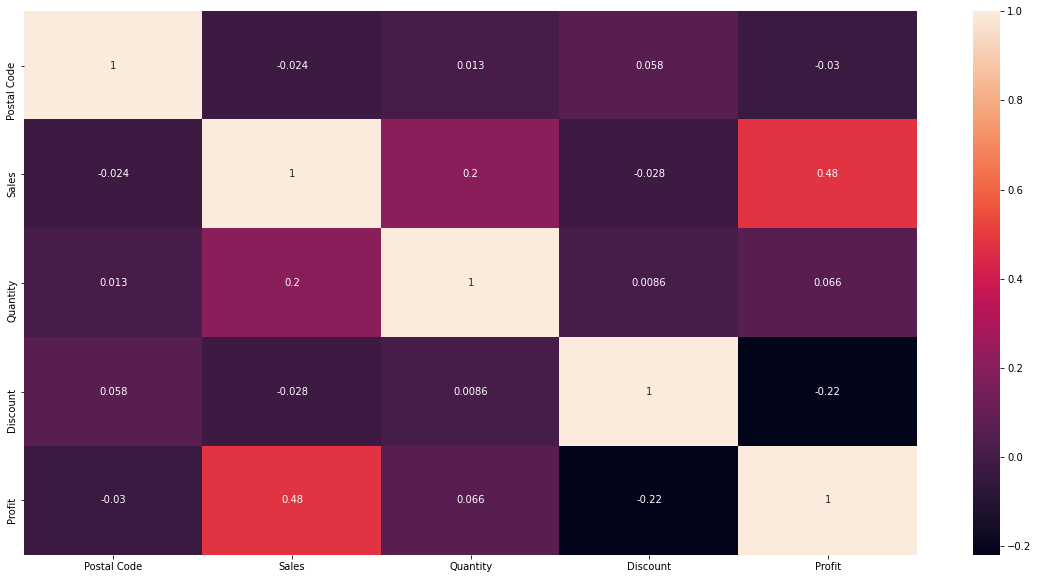

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,ax=ax,annot=True)

From the heatmap we can infer that:

1. Sales and profits have a positive correlation.
2. Discounts and profits have a negative correlation.

In [14]:
total_sales = round(data["Sales"].sum(),3)
total_profit = round(data["Profit"].sum(),2)

In [15]:
total_sales

2297200.86

In [17]:
total_profit

286397.02

In [18]:
top_states_sales = data.groupby("State").Sales.sum().nlargest(n=10)

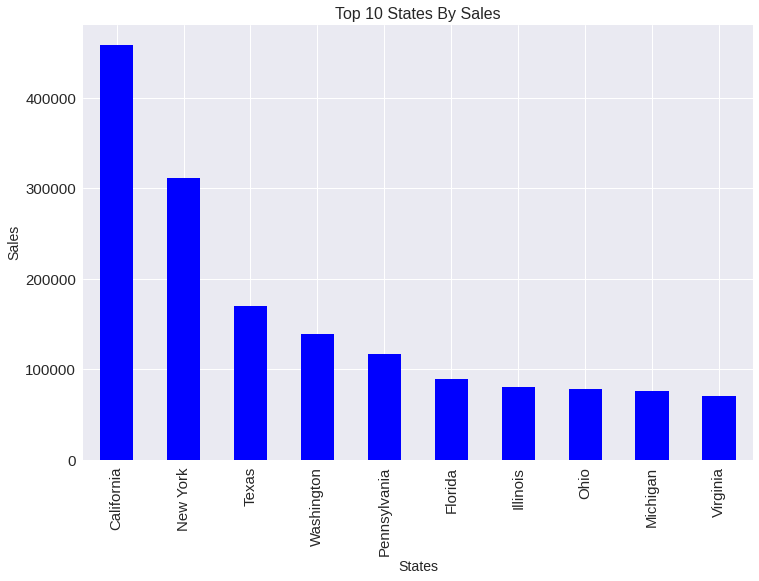

In [19]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
top_states_sales.plot(kind="bar",fontsize = 15,color="blue")
plt.xlabel("States",size=14)
plt.ylabel("Sales",size=14)
plt.title("Top 10 States By Sales",size=16)
plt.show()


From the above graph we can conclude that California has highest sales.

In [20]:
top_states_profits = data.groupby("State").Profit.sum().nlargest(n=10)

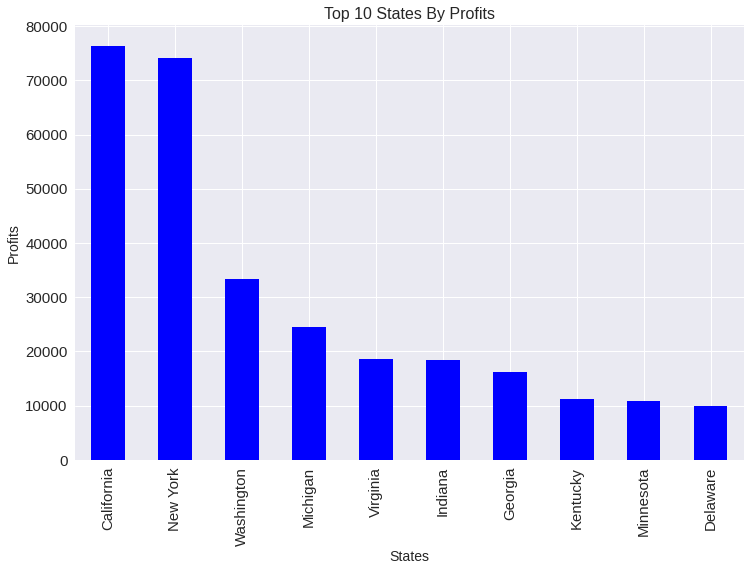

In [21]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
top_states_profits.plot(kind="bar",fontsize = 15,color=["blue"])
plt.xlabel("States",size=14)
plt.ylabel("Profits",size=14)
plt.title("Top 10 States By Profits",size=16)
plt.show()


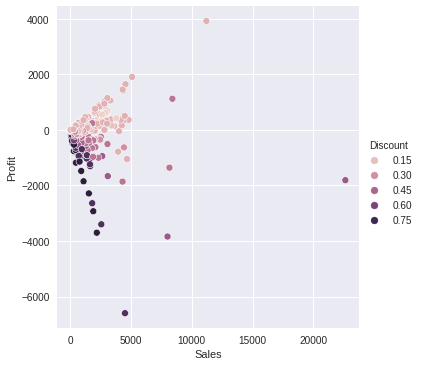

In [22]:
# Effect of discounts on the company

data_dis = data[data['Discount']!=0]
sns.relplot(x='Sales',y='Profit',data = data_dis,hue="Discount")

From the above graph we can infer that higher the discount, higher the losses. 

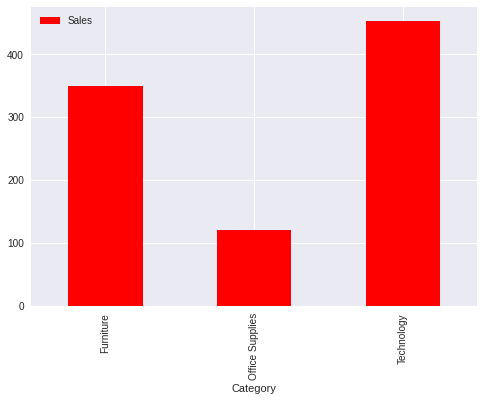

In [23]:
#Sales in each category

cat_sales=pd.pivot_table(data,index='Category',values='Sales')
cat_sales.plot(kind='bar',color="r")

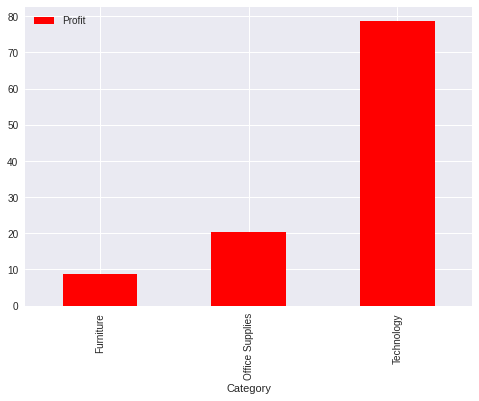

In [24]:
# Profit in each category

cat_profits=pd.pivot_table(data,index='Category',values='Profit')
cat_profits.plot(kind='bar',color="r")

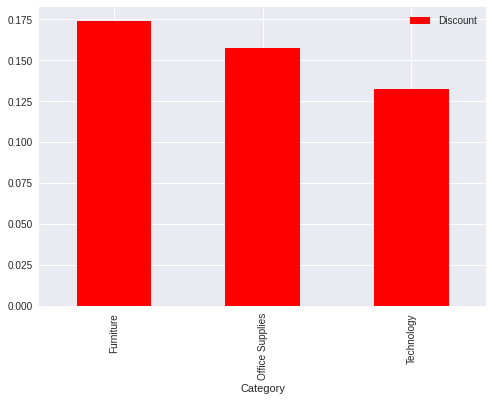

In [25]:
# Discount in each category

cat_disc=pd.pivot_table(data,index='Category',values='Discount')
cat_disc.plot(kind='bar',color="r")

From the above analysis, we can conclude that:

1. Sales for Technology and Furniture are high.
2. Profit for the category of Technology is the highest and far more in comparision to the other categories.
3. Less discounts are given for technology whereas discount for furniture is the highest.

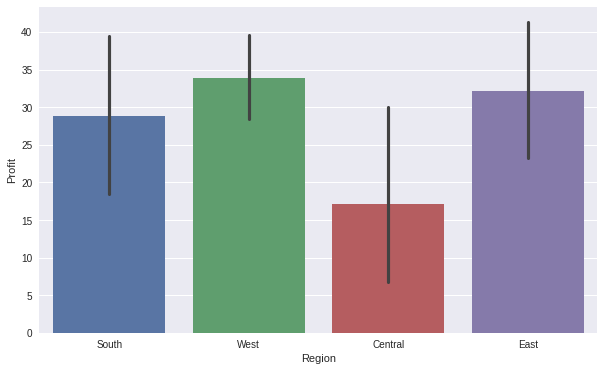

In [26]:
# Profit by Region

plt.figure(figsize = (10,6))
sns.barplot(data = data , x = "Region",y = "Profit")
plt.show()

**Profit in the East and West are quite high.**

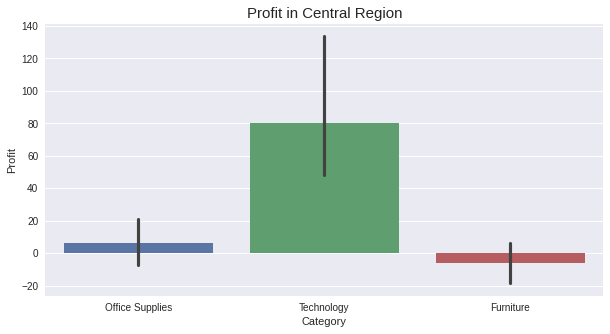

In [27]:
cen_reg = list(data.groupby("Region"))[0][1]
plt.figure(figsize = (10,5))
sns.barplot(data = cen_reg, x = "Category",y = "Profit")
plt.title("Profit in Central Region",size=15)
plt.show()

Furniture section is making loss in the Central Region.

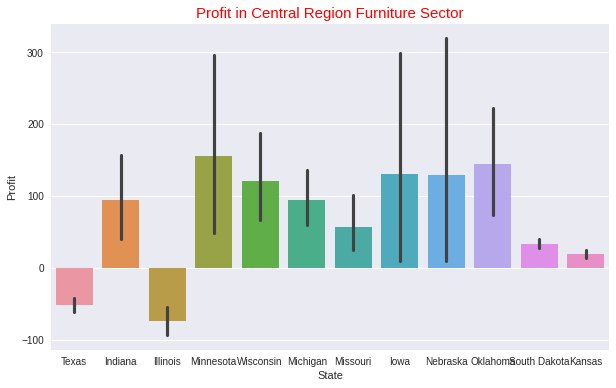

In [28]:
cat_furniture = list(cen_reg.groupby("Category"))[0][1]
plt.figure(figsize=(10,6))
sns.barplot(x="State",y="Profit",data=cat_furniture)
plt.title("Profit in Central Region Furniture Sector",size=15,color="red")
plt.show()

From the above graph, we can say that Texas and Illinois are contributing to the loss significantly.